In [269]:
#Importing libraries for visualization, graphs, and modeling
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
from pylab import *
from scipy import special, optimize
import sys
import os

In [270]:
#Download datasets
train=pd.read_csv('/Users/LindseyTakeuchi/Downloads/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/Users/LindseyTakeuchi/Downloads/house-prices-advanced-regression-techniques/test.csv')
train.drop(columns = 'Id', inplace=True)

Let's look at the surface level of the data

In [271]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [272]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [273]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [274]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


MasVnrArea, BsmtFinSF1, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SSnPorch, etc. have a lot of 0 variables. Need to look at variables that have missing values. 

In [275]:
train.isnull().sum().sort_values(ascending=False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [276]:
test.isnull().sum().sort_values(ascending=False).head()

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
dtype: int64

Dropping variables with too many missing values.

In [277]:
#Drop variables with too many missing values
train = train.drop(["PoolQC","MiscFeature","Alley", "Fence", "FireplaceQu"],axis = 1)

In [278]:
test = test.drop(["PoolQC","MiscFeature","Alley", "Fence", "FireplaceQu"],axis = 1)

In [279]:
#Checking remaining missing values
train.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
GarageFinish     81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
dtype: int64

In [280]:
test.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     227
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
dtype: int64

I can clean it up some more, but let's move on for now. It seems that the missing values in the training and test data sets are mostly the same values.

In [281]:
#Garage Type missing values are probably the same houses
train[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]] = train[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]].fillna("None")

In [282]:
test[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]] = test[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]].fillna("None")

In [283]:
#Check for missing values again
train.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
ExterQual         0
dtype: int64

In [284]:
test.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     227
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
dtype: int64

Looks like the Garage type missing values were from the same house. 

Let's see which variables are most correlated with LotFrontage. Once we find these variables, let's make some graphs to visualize that.

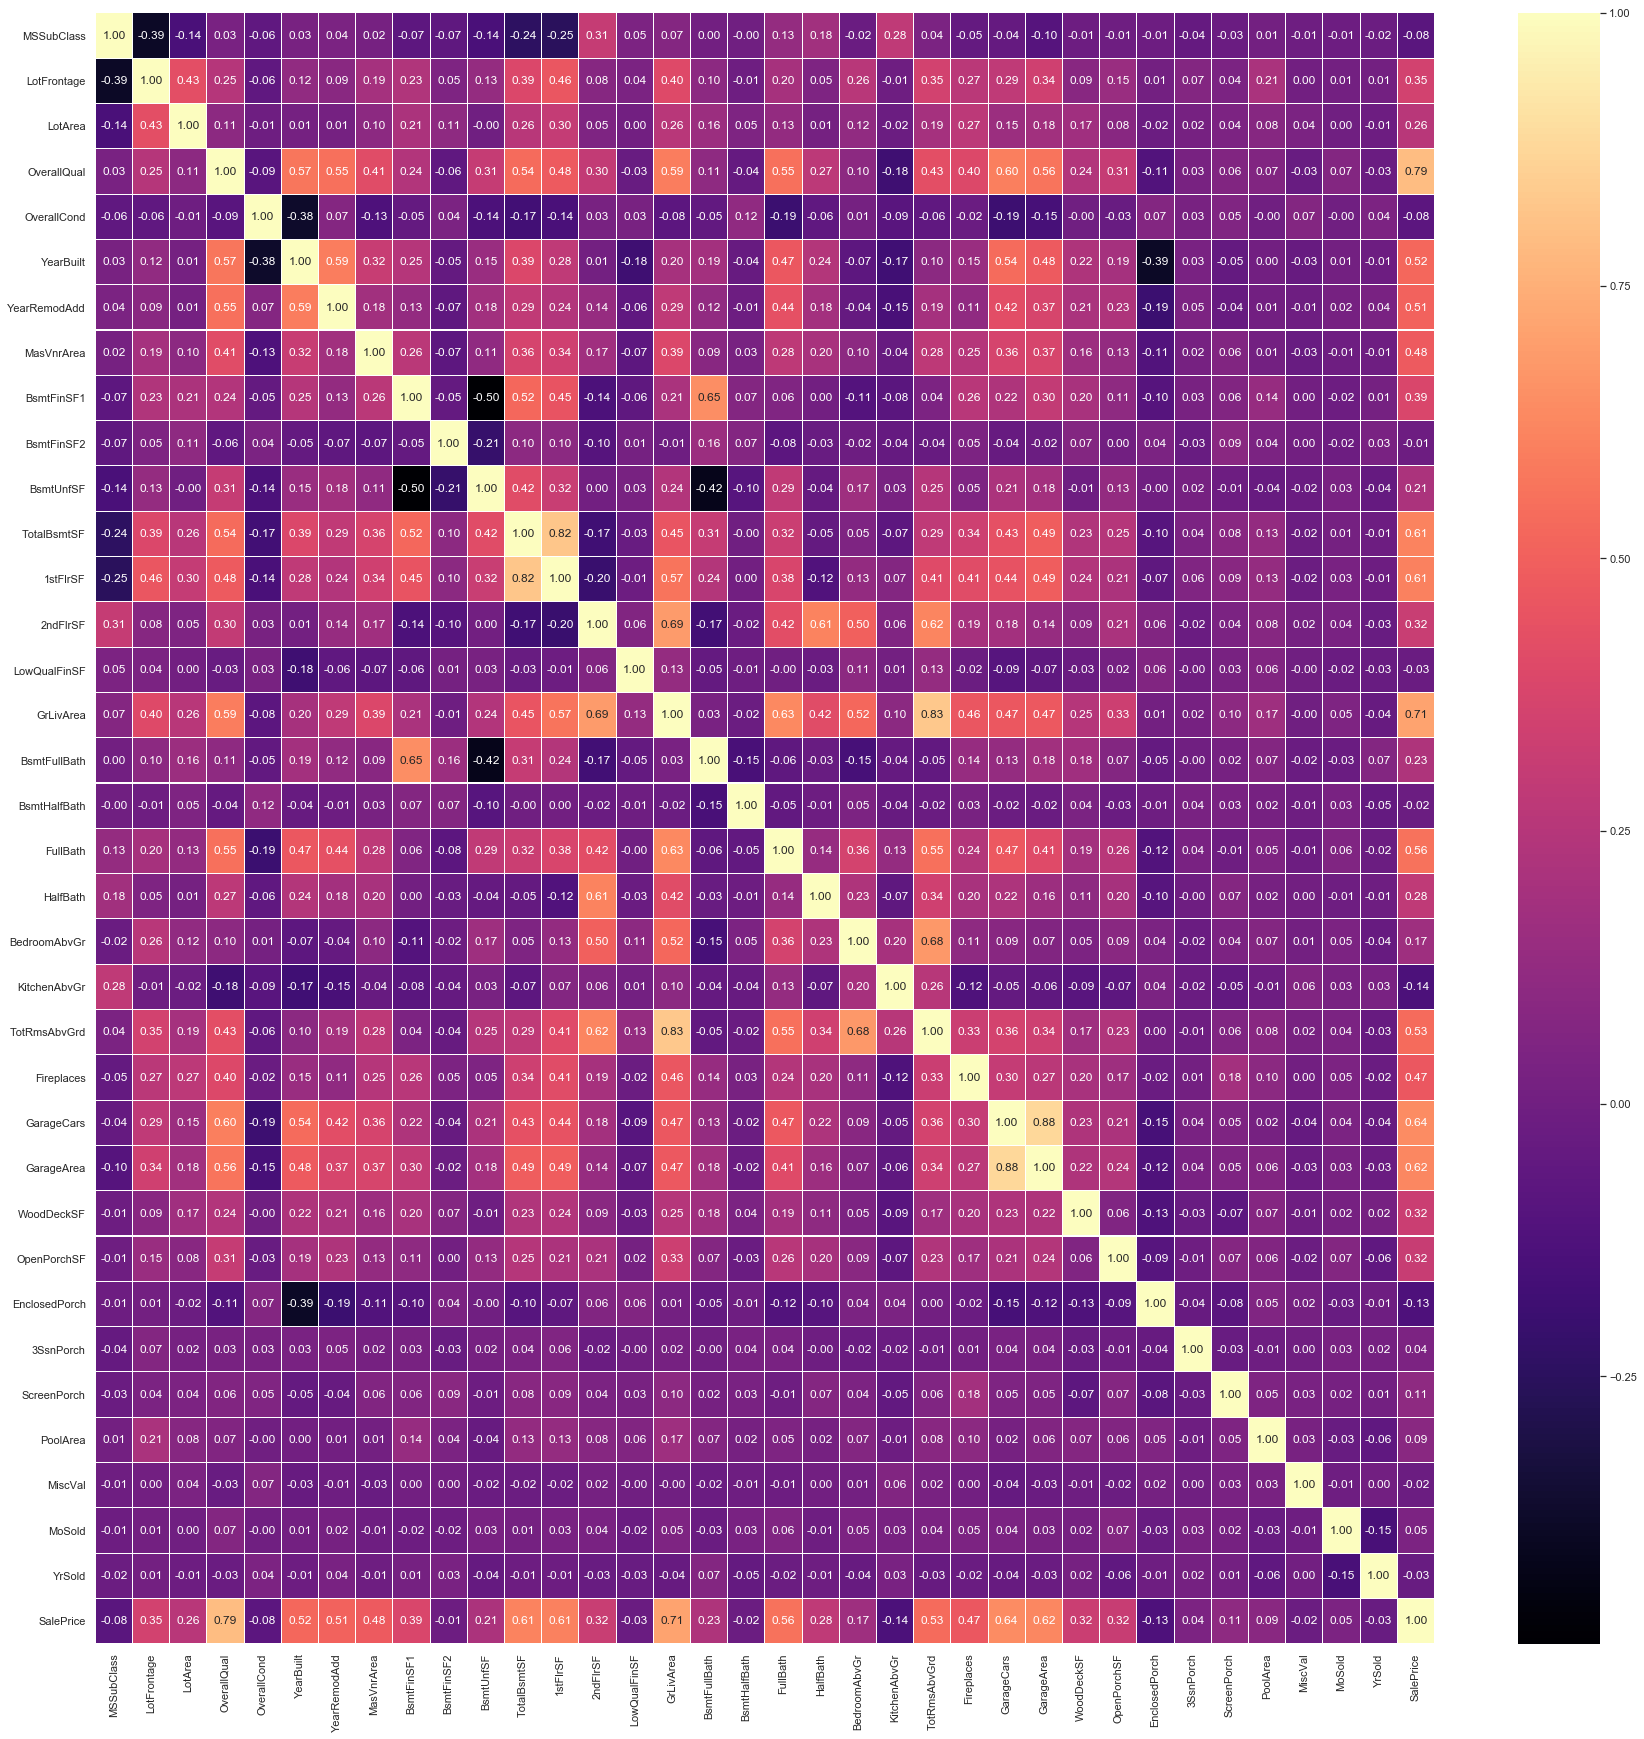

In [285]:
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(train.corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.show()

Histogram above had too many varables. Let's just look at the top 10

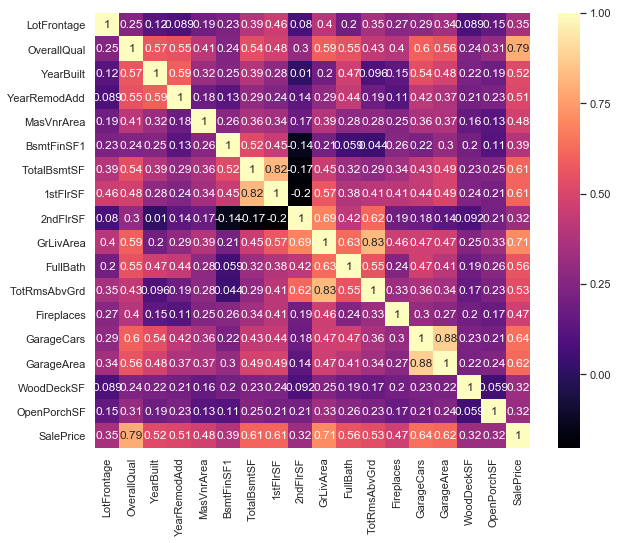

In [286]:
correlations = train.corr()
SalePriceCorr = correlations.index[abs(correlations['SalePrice'])>.3]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train[SalePriceCorr].corr(), cmap="magma", square=True, annot=True)
plt.show()

Looks like SalePrice is most correlated with OverallQual and GLivArea the most. Let's look at it through more graphs

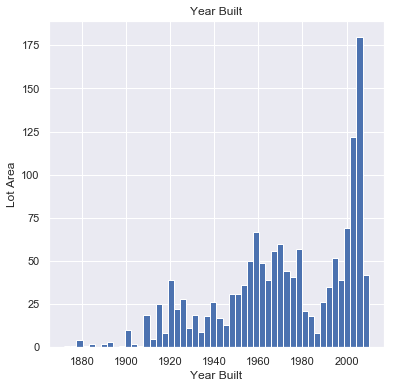

In [287]:
train["YearBuilt"].plot(kind='hist',bins=50,figsize=(6,6))
plt.title("Year Built")
plt.xlabel("Year Built")
plt.ylabel("Lot Area")
plt.show()

Lot Area has increased over the years with a spike especially during the 2000s

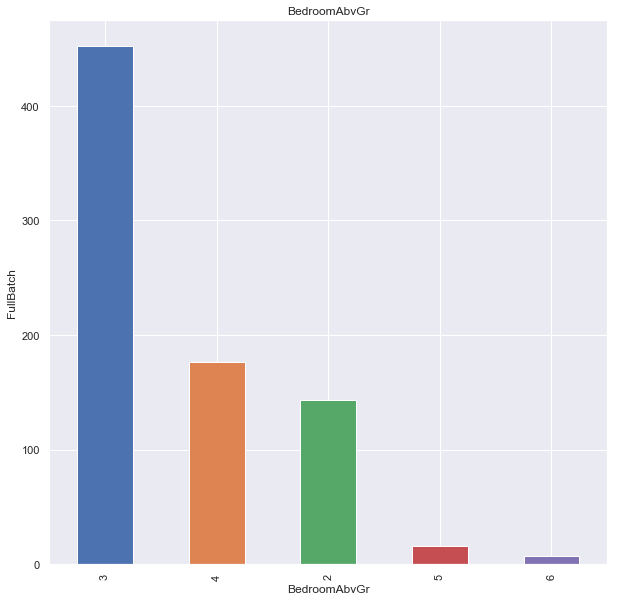

In [288]:
BdrmG=train[train["FullBath"] >1]["BedroomAbvGr"].value_counts().head(5)
plt.title("BedroomAbvGr")
BdrmG.plot(kind='bar',figsize=(10,10))
plt.xlabel("BedroomAbvGr")
plt.ylabel("FullBatch")
plt.show()

Most units have 3 bedrooms. Now, let's try first round of values by picking the most correlated factors.

In [289]:
r1 = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath','LotArea']].copy()
r1.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
0,208500,7,1710,548,856,856,2,8,2003,2003,196.0,0,706,65.0,0,854,61,1,8450
1,181500,6,1262,460,1262,1262,2,6,1976,1976,0.0,1,978,80.0,298,0,0,0,9600
2,223500,7,1786,608,920,920,2,6,2001,2002,162.0,1,486,68.0,0,866,42,1,11250
3,140000,7,1717,642,756,961,1,7,1915,1970,0.0,1,216,60.0,0,756,35,0,9550
4,250000,8,2198,836,1145,1145,2,9,2000,2000,350.0,1,655,84.0,192,1053,84,1,14260


In [290]:
r1['LotFrontage'].fillna((r1['LotFrontage'].mean()), inplace=True)
r1['MasVnrArea'].fillna((r1['MasVnrArea'].mean()), inplace=True)

Check for missing values

In [291]:
sumMissing = r1.isnull().sum()
sumMissing.sort_values(ascending = False)

LotArea         0
YearBuilt       0
OverallQual     0
GrLivArea       0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearRemodAdd    0
HalfBath        0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
SalePrice       0
dtype: int64

No missing values! Let's move on to removing outliers

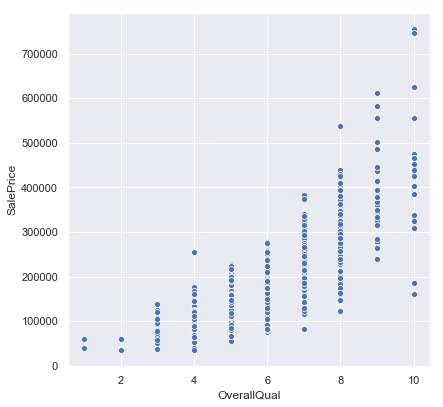

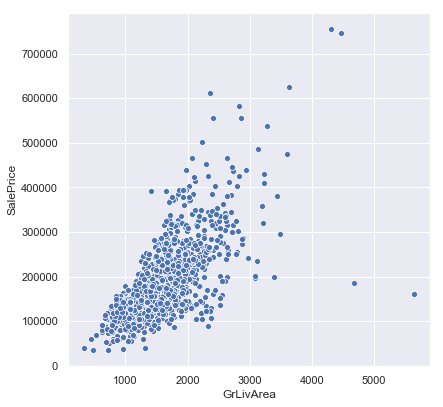

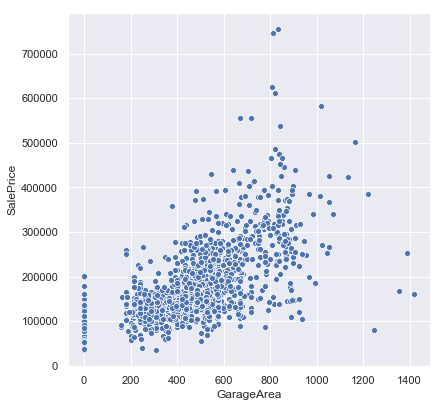

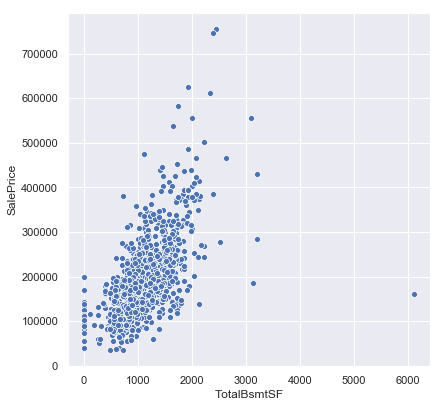

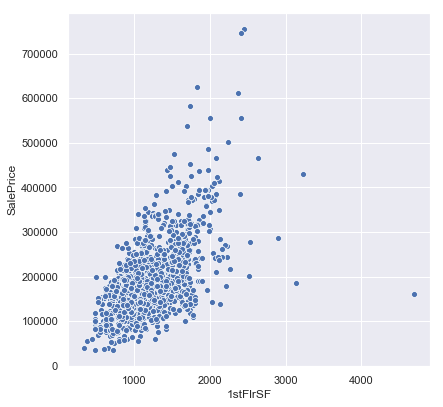

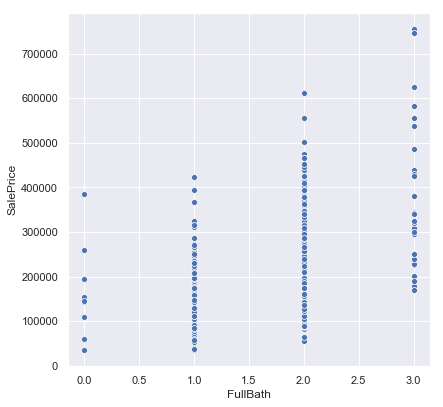

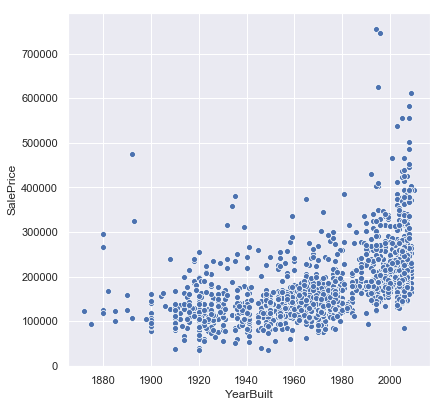

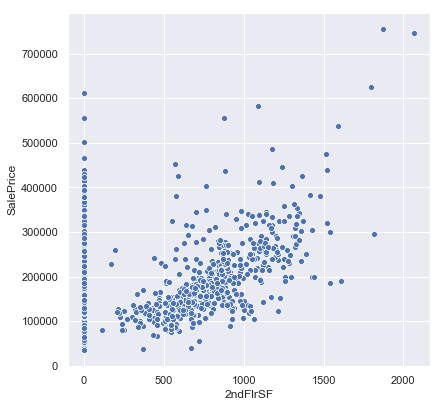

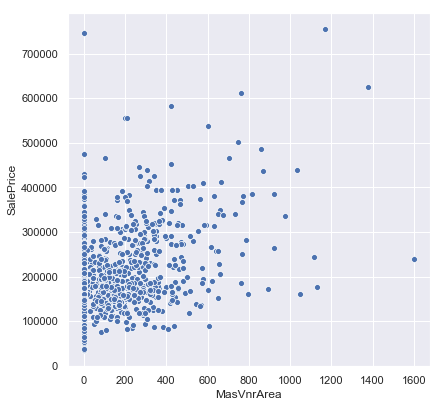

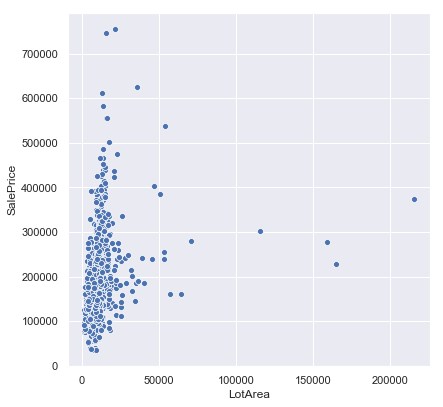

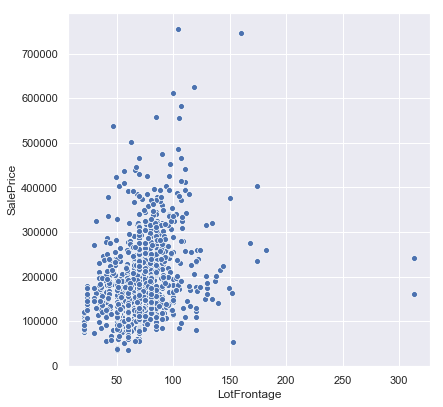

In [292]:
#Copied Tyler's code here
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["OverallQual"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["GrLivArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["GarageArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["TotalBsmtSF"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["1stFlrSF"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["FullBath"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["YearBuilt"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["2ndFlrSF"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["MasVnrArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["LotArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["LotFrontage"], y=r1["SalePrice"], x_jitter=1)

In [293]:

r1["GrLivArea"] = np.where((r1["GrLivArea"] >4500) & (r1["SalePrice"] <250000), r1["GrLivArea"].median(),r1['GrLivArea'])
r1["TotalBsmtSF"] = np.where((r1["TotalBsmtSF"] >4500), r1["TotalBsmtSF"].median(),r1['TotalBsmtSF'])
r1["1stFlrSF"] = np.where((r1["1stFlrSF"] >4000), r1["1stFlrSF"].median(),r1["1stFlrSF"])
r1["SalePrice"] = np.where((r1["SalePrice"] >400000) & (r1["YearBuilt"] <1900), r1["SalePrice"].median(),r1['SalePrice'])
r1["SalePrice"] = np.where((r1["SalePrice"] >700000), r1["SalePrice"].median(),r1['SalePrice'])
r1["MasVnrArea"] = np.where((r1["MasVnrArea"] >1200), r1["MasVnrArea"].median(),r1['MasVnrArea'])
r1["LotArea"] = np.where((r1["LotArea"] >100000), r1["LotArea"].median(),r1['LotArea'])
r1["LotFrontage"] = np.where((r1["LotFrontage"] >250), r1["LotFrontage"].median(),r1['LotFrontage'])

Plot again after removing outliers

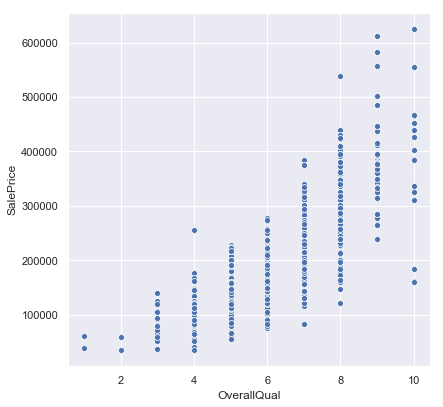

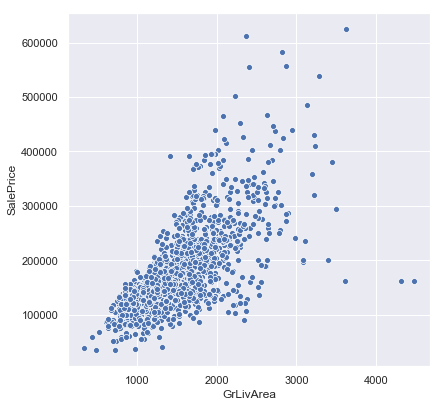

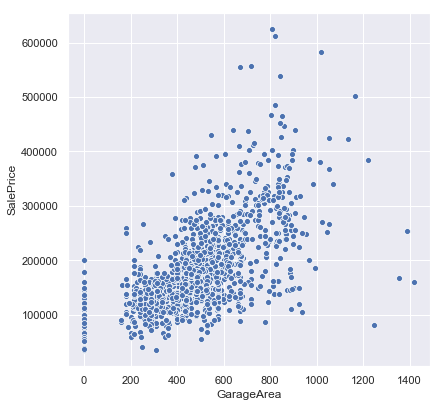

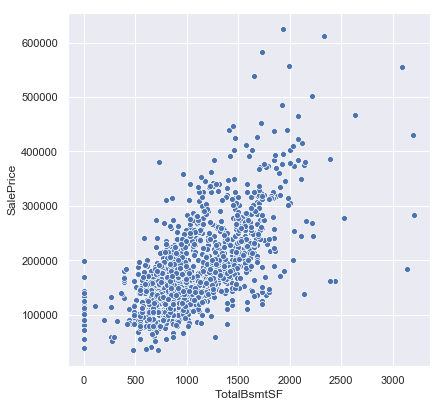

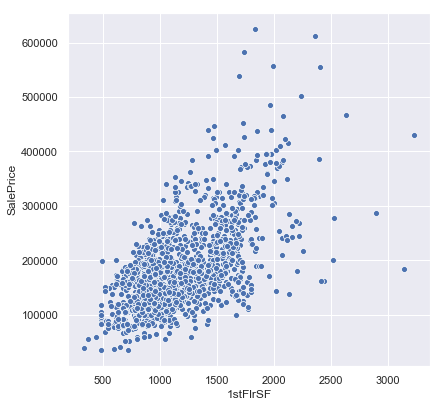

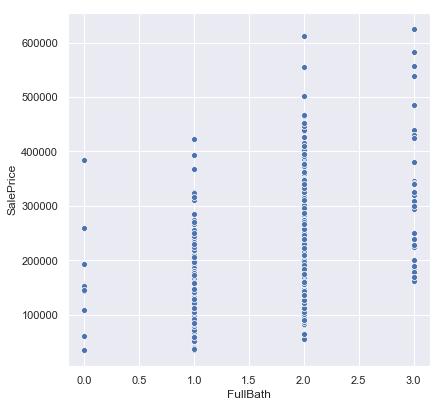

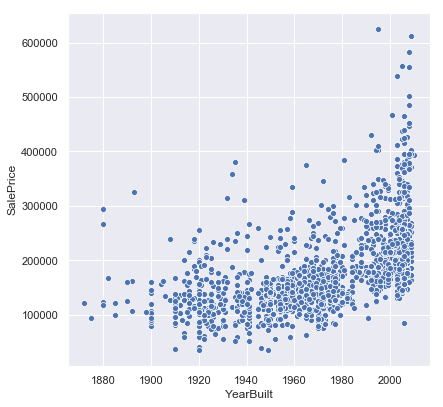

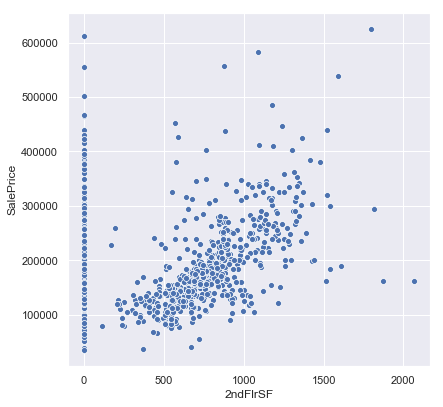

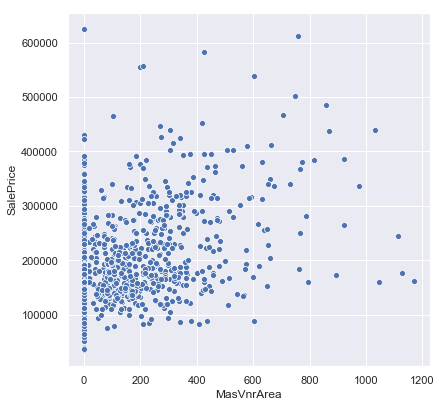

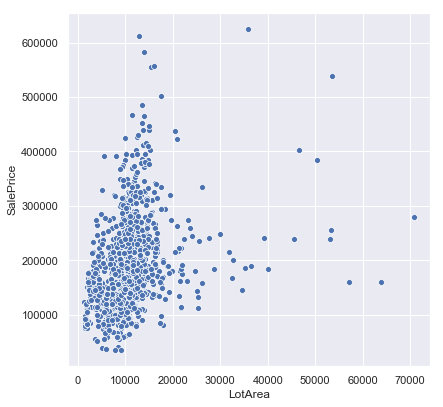

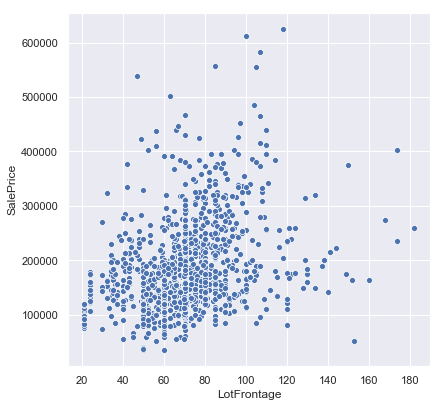

In [294]:
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["OverallQual"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["GrLivArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["GarageArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["TotalBsmtSF"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["1stFlrSF"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["FullBath"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["YearBuilt"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["2ndFlrSF"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["MasVnrArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["LotArea"], y=r1["SalePrice"], x_jitter=1)
fig, ax = plt.subplots(figsize=(6.5,6.5))
sns.scatterplot(x=r1["LotFrontage"], y=r1["SalePrice"], x_jitter=1)

Second set of graphs looks more centralized. Let's start making some estimations
Also dropped the Id for the test set. I forgot to do this earlier when I did it for the train set. 

In [295]:
Id= test.Id
test.drop(columns = 'Id', inplace=True)

In [296]:
train.drop(columns = 'SalePrice', inplace=True)

In [297]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [298]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


Let's use the Robust Scaler to scale r1

In [299]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
r1scaled = robust_scaler.fit(r1).transform(r1)

In [300]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(r1scaled, targettrain)
predictions = linear_regression_model.predict(r1scaled)
mse = mean_squared_error(targettrain, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.1662101966369879


In [207]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Split r1 and targettrain sets to run the regression

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(r1scaled, targettrain, test_size=0.33, random_state=30)

In [302]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.05,)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.011772972619404878
Test MSE: 0.012082189195585253


Let's move on to using what we have to plot the learning curve

In [303]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/LindseyTakeuchi/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

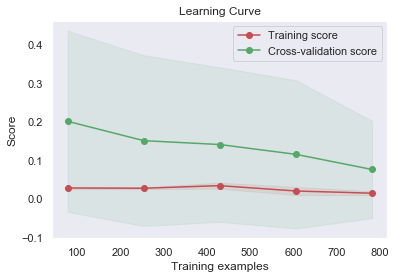

In [304]:
plot_learning_curve(linear_regression_model, "Learning Curve", X_train, y_train, cv=5)

The training score seems increase with more training samples. Looks good! Let's use random search to find the parameters. 

In [305]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .05, .1, .3, 1, 3]}

linear_regression_model = SGDRegressor(tol=.0001)

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)
print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'eta0': 0.3}
Best Negative MSE: -0.021231260002833957


It's a little off, but what can I expect! Let's keep going by plugging these parameters and testing the data. Let's plug in these parameters and run the model on the test. First, I'll produce a scaled test set and clean it up the same way I did above.

In [306]:
test1 = test[[ 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath','LotArea']].copy()
sumMissingtest = test1.isnull().sum()
sumMissingtest.sort_values(ascending = False)

LotFrontage     227
MasVnrArea       15
GarageArea        1
TotalBsmtSF       1
BsmtFinSF1        1
LotArea           0
TotRmsAbvGrd      0
GrLivArea         0
1stFlrSF          0
FullBath          0
YearRemodAdd      0
YearBuilt         0
HalfBath          0
Fireplaces        0
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
OverallQual       0
dtype: int64

In [307]:
test1['LotFrontage'].fillna((test1['LotFrontage'].mean()), inplace=True)
test1['MasVnrArea'].fillna((test1['MasVnrArea'].mean()), inplace=True)
test1['GarageArea'].fillna((test1['GarageArea'].mean()), inplace=True)
test1['BsmtFinSF1'].fillna((test1['BsmtFinSF1'].mean()), inplace=True)
test1['TotalBsmtSF'].fillna((test1['TotalBsmtSF'].mean()), inplace=True)


Check for missing values again

In [308]:
sumMissingtest = test1.isnull().sum()
sumMissingtest.sort_values(ascending = False)

LotArea         0
HalfBath        0
GrLivArea       0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
OverallQual     0
dtype: int64

Missing values are now all gone! Let's run this regression.

In [309]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
test1scaled = robust_scaler.fit(test1).transform(test1)

In [310]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.03)
linear_regression_model.fit(r1scaled, targettrain)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.03, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [311]:
train.shape

(1460, 74)

I had some difficulties with an extra column, so I was trying to find out the extra column.

In [312]:
test.shape

(1459, 74)

In [313]:
test1scaled.shape

(1459, 18)

In [314]:
r1scaled.shape

(1460, 19)

In [315]:
r1scaled=pd.DataFrame(r1scaled)

In [316]:
r1scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.544747,0.5,0.380510,0.281573,-0.269691,-0.452849,0.0,1.0,0.652174,0.243243,1.200613,-1.0,0.452790,-0.265787,0.000000,1.173077,0.529412,1.0,-0.256473
1,0.221491,0.0,-0.312452,-0.082816,0.539880,0.344794,0.0,0.0,0.065217,-0.486486,0.000000,0.0,0.834679,0.523686,1.773810,0.000000,-0.367647,0.0,0.030507
2,0.724334,0.5,0.498067,0.530021,-0.142074,-0.327112,0.0,0.0,0.608696,0.216216,0.992343,0.0,0.143910,-0.107893,0.000000,1.189560,0.250000,1.0,0.442261
3,-0.275367,0.5,0.391338,0.670807,-0.469093,-0.246562,-1.0,0.5,-1.260870,-0.648649,0.000000,0.0,-0.235170,-0.528945,0.000000,1.038462,0.147059,0.0,0.018030
4,1.041604,1.0,1.135344,1.474120,0.306580,0.114931,0.0,1.5,0.586957,0.162162,2.143951,0.0,0.381186,0.734213,1.142857,1.446429,0.867647,1.0,1.193399


In [317]:
test1scaled=pd.DataFrame(test1scaled)

In [318]:
test1scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.5,-0.888152,0.968992,-0.203846,-0.359528,-1.0,-0.5,-0.250000,-0.756098,0.000000,0.0,0.155585,0.634425,0.833333,0.000000,-0.388889,0.0,0.538713
1,0.0,-0.170671,-0.651163,0.655769,0.491159,-1.0,0.0,-0.312500,-0.829268,0.666667,0.0,0.760638,0.689980,2.339286,0.000000,0.111111,1.0,1.179692
2,-0.5,0.326429,0.007752,-0.115385,-0.296660,0.0,0.0,0.500000,0.146341,0.000000,1.0,0.585106,0.301091,1.261905,1.036982,0.083333,1.0,1.073791
3,0.0,0.285004,-0.038760,-0.119231,-0.300589,0.0,0.5,0.520833,0.146341,0.123457,1.0,0.333777,0.523313,2.142857,1.002959,0.111111,1.0,0.140313
4,1.0,-0.251864,0.100775,0.561538,0.394892,0.0,-0.5,0.395833,0.000000,0.000000,0.0,-0.117021,-1.421131,0.000000,0.000000,0.750000,0.0,-1.064825


In [323]:
predicted_prices = np.exp(linear_regression_model.predict(r1scaled))

Ran my linear regression! 

In [ ]:
sub1 = pd.DataFrame({'Id':Id,'SalePrice':predicted_prices})
sub1.to_csv("sub1.csv",index=False)

3064th place with a score of .16116 using only linear regression. Let's use more regressions now to get a higher score.

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "/Users/LindseyTakeuchi/Desktop/HW2 Pic.png", width=400, height=300)

Let's try K Nearest Neighbors to see if we get a better score. 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(r1scaled, targettrain, test_size=0.20, random_state=42)
reg = KNeighborsRegressor()
gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
y_pred_train = gridsearch.predict(X_train)
y_pred_test = gridsearch.predict(X_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Parameters and MSE looks alright. Let's run the regression.

In [ ]:
KNreg = KNeighborsRegressor(n_neighbors=9, weights='distance', p=1)
KNreg.fit(r1scaled, targettrain)

In [ ]:
predicted_prices2 = np.exp(KNreg.predict(test1scaled))

In [ ]:
sub2 = pd.DataFrame({'Id':Id,'SalePrice':predicted_prices})
sub2.to_csv('sub2.csv', index=False)

Second submission still stayed at .16116 using K Nearest Neighbors. Weird, but it's okay. 